# Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Users\\USER-PC\\Downloads\\onlinefraud.csv~1\\onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [5]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.isFraud.unique()

array([0, 1], dtype=int64)

# Descriptive Analysis

In [9]:
data= print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


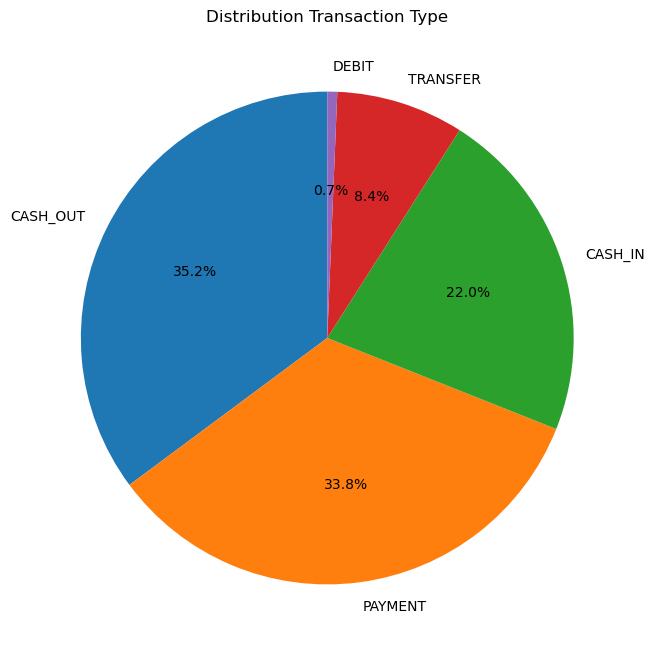

In [10]:
type_counts = df["type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution Transaction Type")
plt.show()

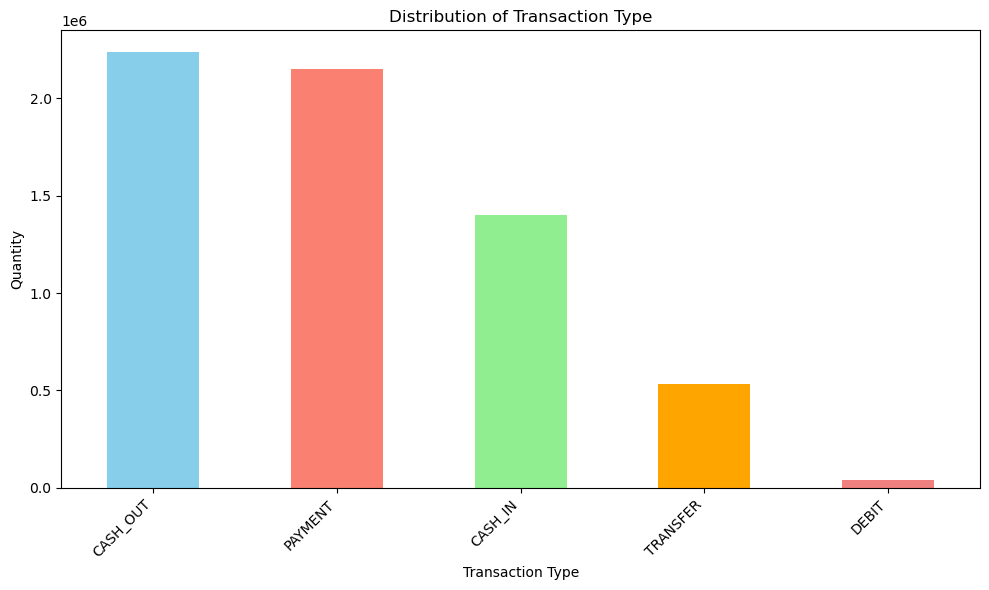

In [11]:
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=colors)
plt.xlabel('Transaction Type')
plt.ylabel('Quantity')
plt.title('Distribution of Transaction Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot above reveals that there were Five different transactions that took place, namely  Cash out, payment, Cash_in, Transfer and debit with the percentage occurence of 35.2%,33.8%,22.0%, 8.4% and 0.7% respectively.The result of this description further reveals that the cash_out transaction had the highest number of occurence while debit transaction has the lowest.

In [12]:
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


From the result of descriptive analysis,it was discovered that the total number of transactions that took place was 6362620.00, the average amount involved in any transaction was 179861.90, the minimum amount was 0.00, while the maximum amount was 92445516.64. The result further shows the average balance in the origin account before the transaction occured was 833883.10, the minimum balance was 0.00 while the maximum was 59585040.37, the average account balance in the origin account after the occurence of transaction was 855113.67, the minimum balance was 0.00, while the maximum was 144258.41. Conversely, the result shows that the average balance in the destination account before any transactions was 1.100702e+06, the minimum was 0.000000e+00, while the maximum was 3.560159e+08, the average balance in the destination account after transaction was 1.224996e+06, the minimum  balance was 0.000000e+00, while the maximum was 3.561793e+08. 

# Data Transformation

In [13]:
df.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT', 'DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [14]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Description of target variabe before resampling

In [15]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [16]:
# You may need to adjust this mapping based on your actual data
fraud_mapping = {0: 'No fraud', 1: 'Fraud'}

# Apply the mapping to 'isFraud' column
df['isFraud'] = df['isFraud'].map(fraud_mapping)


In [17]:
df.isFraud.value_counts()

No fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64

In [18]:
df.isFraud.unique()

array(['No fraud', 'Fraud'], dtype=object)

In [19]:
df.describe().round(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.0
mean,243.40,2.06,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.0
std,142.33,0.98,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.0
min,1.00,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.0
25%,156.00,1.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.0
50%,239.00,2.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.0
75%,335.00,3.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.0
max,743.00,5.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.0


# Correlation Analysis

In [20]:
df.corr()

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_6956\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,-0.000529
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,1.000000


C:\Users\USER-PC\AppData\Local\Temp\ipykernel_6956\2917969794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(3), annot= True, cmap='coolwarm')


<Axes: >

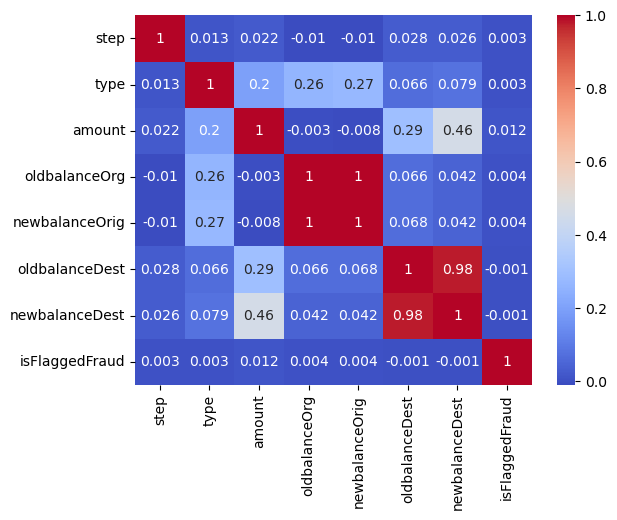

In [21]:
sns.heatmap(df.corr().round(3), annot= True, cmap='coolwarm')

From the result of corrlation analysis, it was discovered that all the variables involved in this analysis possess some level of correlation or relationship with fraud possibility(positive or negative); amount, oldbalanceorig, newbalancedest had a positive correlation with fraud possibility while newbalanceorig, oldbalancedest has a negative correlation with fraud possibility.

## Handling the imbalance in the dataset, to generate a balanced dataset

In [22]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame df
# X is your feature matrix, and y is your target variable

# Print the counts of fraud and non-fraud cases in the original dataset
print("Original Class Distribution:")
print(df['isFraud'].value_counts())

# Separate fraud and non-fraud cases
fraud_cases = df[df['isFraud'] == 'Fraud']
non_fraud_cases = df[df['isFraud'] == 'No fraud']

# Print the counts of fraud and non-fraud cases before resampling
print("Before Resampling:")
print("Fraud cases:", len(fraud_cases))
print("Non-fraud cases:", len(non_fraud_cases))

# Randomly sample non-fraud cases to balance the dataset
non_fraud_sampled = non_fraud_cases.sample(n=len(fraud_cases), random_state=42)

# Combine the sampled non-fraud cases with fraud cases to create the balanced dataset
balanced_df = pd.concat([fraud_cases, non_fraud_sampled])

# Shuffle the entire dataset to mix the order of samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the counts of fraud and non-fraud cases after resampling
print("After Resampling:")
print("Fraud cases:", len(balanced_df[balanced_df['isFraud'] == 'Fraud']))
print("Non-fraud cases:", len(balanced_df[balanced_df['isFraud'] == 'No fraud']))

# Print the first few entries in the DataFrame to check
print(balanced_df.head())

# Overwrite the entire dataset with the balanced values
df_resampled = balanced_df.copy()

# Now, df contains the entire dataset with the resampled 'isFraud' values


Original Class Distribution:
No fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64
Before Resampling:
Fraud cases: 8213
Non-fraud cases: 6354407
After Resampling:
Fraud cases: 8213
Non-fraud cases: 8213
   step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   397     3    76550.74   C658247527     1096252.93      1172803.66   
1   251     2    12617.11  C1812418129      339181.87       326564.76   
2    98     1     8055.06  C1544350298        8055.06            0.00   
3   550     4   342309.91   C662184778      342309.91            0.00   
4   586     1  2581549.92   C648614053     2581549.92            0.00   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0   C492670573      2208784.02      2132233.28  No fraud               0  
1  M1924423059            0.00            0.00  No fraud               0  
2   C912405348            0.00         8055.06     Fraud               0  
3  C1740503020            0.00            0.

# Description of target variable After Resampling

In [23]:
df_resampled.isFraud.value_counts()

No fraud    8213
Fraud       8213
Name: isFraud, dtype: int64

In [24]:
df_resampled.isFraud.isna().sum()

0

In [25]:
df.describe().round()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.0,2.0,179862.0,833883.0,855114.0,1100702.0,1224996.0,0.0
std,142.0,1.0,603858.0,2888243.0,2924049.0,3399180.0,3674129.0,0.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,1.0,13390.0,0.0,0.0,0.0,0.0,0.0
50%,239.0,2.0,74872.0,14208.0,0.0,132706.0,214661.0,0.0
75%,335.0,3.0,208721.0,107315.0,144258.0,943037.0,1111909.0,0.0
max,743.0,5.0,92445517.0,59585040.0,49585040.0,356015889.0,356179279.0,1.0


# Machine Learning Tasks

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Training on Raw data

In [29]:
X=df_resampled[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
Y=df_resampled.isFraud

In [30]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,76550.74,1096252.93,1172803.66,2208784.02,2132233.28,0
1,2,12617.11,339181.87,326564.76,0.00,0.00,0
2,1,8055.06,8055.06,0.00,0.00,8055.06,0
3,4,342309.91,342309.91,0.00,0.00,0.00,0
4,1,2581549.92,2581549.92,0.00,0.00,2581549.92,0
...,...,...,...,...,...,...,...
16421,1,542461.74,0.00,0.00,1757516.20,2299977.94,0
16422,3,2032.93,7625673.00,7627705.93,323961.50,321928.56,0
16423,1,156220.74,156220.74,0.00,0.00,156220.74,0
16424,4,1871553.73,1871553.73,0.00,0.00,0.00,0


In [31]:
Y

0        No fraud
1        No fraud
2           Fraud
3           Fraud
4           Fraud
           ...   
16421    No fraud
16422    No fraud
16423       Fraud
16424       Fraud
16425    No fraud
Name: isFraud, Length: 16426, dtype: object

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## GaussianNB model on Raw data

In [33]:
Raw_model=GaussianNB().fit(X_train,Y_train)

In [34]:
train_ypred_raw=Raw_model.predict(X_train)

In [35]:
y_pred_raw = Raw_model.predict(X_test)

# Perfomance of model  on Training Dataset

In [36]:
print(accuracy_score(Y_train,train_ypred_raw))
print(classification_report(Y_train,train_ypred_raw))
print(confusion_matrix(Y_train,train_ypred_raw))

0.6568968516263698
              precision    recall  f1-score   support

       Fraud       0.94      0.33      0.49      5729
    No fraud       0.60      0.98      0.74      5769

    accuracy                           0.66     11498
   macro avg       0.77      0.66      0.62     11498
weighted avg       0.77      0.66      0.62     11498

[[1905 3824]
 [ 121 5648]]


# Performance of model on Test Dataset

In [37]:
print(accuracy_score(Y_test,y_pred_raw))
print(classification_report(Y_test,y_pred_raw))
print(confusion_matrix(Y_test,y_pred_raw))

0.648336038961039
              precision    recall  f1-score   support

       Fraud       0.96      0.32      0.48      2484
    No fraud       0.59      0.99      0.74      2444

    accuracy                           0.65      4928
   macro avg       0.77      0.65      0.61      4928
weighted avg       0.77      0.65      0.60      4928

[[ 786 1698]
 [  35 2409]]


# FEATURE ENGINEERING

In [38]:
df_resampled['amount_relative_to_balance_orig'] = df_resampled['amount'] / (df_resampled['oldbalanceOrg'] + 0.1)
df_resampled['newbalanceDest_rank'] = df_resampled.groupby('nameDest')['newbalanceDest'].rank() 
df_resampled['average_transaction_amount_dest']= df_resampled.groupby('nameDest')['amount'].transform('mean')

In [39]:
df_resampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_relative_to_balance_orig,newbalanceDest_rank,average_transaction_amount_dest
0,397,3,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,No fraud,0,6.982944e-02,1.0,76550.74
1,251,2,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,No fraud,0,3.719865e-02,1.0,12617.11
2,98,1,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,Fraud,0,9.999876e-01,1.0,8055.06
3,550,4,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,Fraud,0,9.999997e-01,1.0,342309.91
4,586,1,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,Fraud,0,1.000000e+00,1.0,2581549.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,382,1,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,No fraud,0,5.424617e+06,1.0,542461.74
16422,40,3,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,No fraud,0,2.665902e-04,1.0,2032.93
16423,484,1,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,Fraud,0,9.999994e-01,1.0,156220.74
16424,71,4,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,Fraud,0,9.999999e-01,1.0,1871553.73


In [40]:
df_resampled['newbalanceDest_rank'].unique()

array([1. , 2. , 1.5, 3. ])

# First Model

In [41]:
X=df_resampled[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','amount_relative_to_balance_orig','newbalanceDest_rank','average_transaction_amount_dest']]
Y=df_resampled.isFraud

In [42]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2, random_state=42)

In [43]:
First_model= GaussianNB().fit(X_train,Y_train)

In [44]:
y_train_pred=First_model.predict(X_train)

In [45]:
First_accuracy_train= accuracy_score(Y_train,y_train_pred)
First_conf_matrix_train= confusion_matrix(Y_train, y_train_pred)
First_classification_report_train= classification_report(Y_train, y_train_pred)

In [46]:
print(f"Accuracy of First Model on training set:{First_accuracy_train:.4f}")
print("Training set Confusion Matrix(First_model):")
print(First_conf_matrix_train)
print(First_classification_report_train)

Accuracy of First Model on training set:0.7775
Training set Confusion Matrix(First_model):
[[4204 2345]
 [ 579 6012]]
              precision    recall  f1-score   support

       Fraud       0.88      0.64      0.74      6549
    No fraud       0.72      0.91      0.80      6591

    accuracy                           0.78     13140
   macro avg       0.80      0.78      0.77     13140
weighted avg       0.80      0.78      0.77     13140



In [47]:
y_val_pred=First_model.predict(X_val)

In [48]:
First_accuracy= accuracy_score(Y_val,y_val_pred)
conf_matrix_First= confusion_matrix(Y_val, y_val_pred)
classification_report_First= classification_report(Y_val, y_val_pred)

In [50]:
print(f"First Model Accuracy:{First_accuracy:.4f}")
print("Confusion Matrix(First_model):")
print(conf_matrix_First)
print(classification_report_First)

First Model Accuracy:0.7559
Confusion Matrix(First_model):
[[1022  642]
 [ 160 1462]]
              precision    recall  f1-score   support

       Fraud       0.86      0.61      0.72      1664
    No fraud       0.69      0.90      0.78      1622

    accuracy                           0.76      3286
   macro avg       0.78      0.76      0.75      3286
weighted avg       0.78      0.76      0.75      3286



In [51]:
error_indices = [i for i, (true_val, pred_val) in enumerate(zip(Y_val, y_val_pred)) if true_val != pred_val]

In [52]:
# Reset index of X_val and Y_val
X_val_reset = X_val.reset_index(drop=True)
Y_val_reset = Y_val.reset_index(drop=True)

# Use reset indices to extract X_improve and y_improve
X_improve = X_val_reset.loc[error_indices]
y_improve = Y_val_reset.loc[error_indices]


In [53]:
y_improve.value_counts()

Fraud       642
No fraud    160
Name: isFraud, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_improved_scaled = scaler.fit_transform(X_improve)
X_val_scaled = scaler.transform(X_val)

In [55]:
improved_model= RandomForestClassifier()
improved_model.fit(X_improved_scaled, y_improve)

RandomForestClassifier()

In [67]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=improved_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_improved_scaled, y_improve)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_rf_model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_val, predictions)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.6615946439440049
              precision    recall  f1-score   support

       Fraud       0.60      0.98      0.75      1664
    No fraud       0.96      0.33      0.49      1622

    accuracy                           0.66      3286
   macro avg       0.78      0.66      0.62      3286
weighted avg       0.78      0.66      0.62      3286

[[1639   25]
 [1087  535]]


In [68]:
def combine_predictions(model1_preds, model2_preds):
    combined_preds = []

    if isinstance(model1_preds[0], str):
        model1_preds = ['Fraud' if pred == 'Fraud' else 'No fraud' for pred in model1_preds]
        model2_preds = ['Fraud' if pred == 'Fraud' else 'No fraud' for pred in model2_preds]

    # Append results to the combined_preds array
    for pred1, pred2 in zip(model1_preds, model2_preds):
        if pred1 == 'Fraud' and pred2 == 'Fraud':
            combined_preds.append('Fraud')
        elif pred1 == 'No fraud' and pred2 == 'No fraud':
            combined_preds.append('No fraud')
        else:
            combined_preds.append('No fraud')

    return combined_preds



In [69]:
First_model_val_preds = First_model.predict(X_val)
improved_model_val_preds = best_rf_model.predict(X_val_scaled)
combined_val_preds = combine_predictions(First_model_val_preds, improved_model_val_preds)


In [70]:
# Now, calculate classification metrics
combined_accuracy = accuracy_score(Y_val, combined_val_preds)
combined_matrix = confusion_matrix(Y_val, combined_val_preds)


In [71]:
from sklearn.metrics import classification_report

# Assuming Y_val_binary and combined_val_preds_binary are defined
print("Confusion Matrix:")
print(combined_matrix)

print("\nClassification Report:")
print(classification_report(Y_val, combined_val_preds))

print("\nAccuracy:", combined_accuracy)


Confusion Matrix:
[[ 997  667]
 [   0 1622]]

Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.60      0.75      1664
    No fraud       0.71      1.00      0.83      1622

    accuracy                           0.80      3286
   macro avg       0.85      0.80      0.79      3286
weighted avg       0.86      0.80      0.79      3286


Accuracy: 0.7970176506390748


In [84]:
import joblib

# Save the first model
joblib.dump(First_model, 'First_model.pkl')

# Save the improved model
joblib.dump(best_rf_model, 'Improved_model.pkl')

# Save the combine_predictions function
joblib.dump(combine_predictions, 'combine_predictions.pkl')


['combine_predictions.pkl']

In [85]:
import joblib

# Load the first model
loaded_first_model = joblib.load('First_model.pkl')

# Load the improved model
loaded_improved_model = joblib.load('Improved_model.pkl')

# Load the combine_predictions function
loaded_combine_predictions = joblib.load('combine_predictions.pkl')

# Print the content of the loaded function
print(loaded_combine_predictions)


<function combine_predictions at 0x000002AD86D131A0>


In [88]:
import pickle

with open('combine_predictions.pkl', 'rb') as file:
    content = pickle.load(file)
    print(content)


<function combine_predictions at 0x000002AD86D131A0>


In [77]:
import pandas as pd

# Convert NumPy array to pandas Series
combined_val_preds_series = pd.Series(combined_val_preds)
print(combined_val_preds_series.value_counts())


No fraud    2289
Fraud        997
dtype: int64


In [93]:
import pandas as pd
import pickle

# Function to preprocess input data
def preprocess_input(data):
    # Convert 'type' feature to numerical encoding
    type_mapping = {'PAYMENT': 2, 'TRANSFER': 4, 'CASH_OUT': 1, 'DEBIT': 5, 'CASH_IN': 3}

    # Map the 'type' column to numerical values
    data['type'] = data['type'].map(type_mapping)

    # Implement other preprocessing steps based on your training data
    # ...

    # Return the preprocessed data
    return data

# Function to make predictions
def make_predictions(model1, model2, input_data):
    # Assuming model1 and model2 are loaded models
    # Preprocess input data
    preprocessed_data = preprocess_input(input_data)

    # Make predictions using loaded models
    pred1 = model1.predict(preprocessed_data)
    pred2 = model2.predict(preprocessed_data)

    # Combine predictions using the loaded_combine_predictions function
    combined_preds = loaded_combine_predictions(pred1, pred2)

    return combined_preds

# Function to display prediction result
def display_prediction_result(result):
    if result[0] == 'Fraud':
        print("Predicted Result: Fraud")
    else:
        print("Predicted Result: No Fraud")

# Load the first model
with open('First_model.pkl', 'rb') as model_file:
    loaded_first_model = joblib.load(model_file)

# Load the improved model
with open('Improved_model.pkl', 'rb') as model_file:
    loaded_improved_model = joblib.load(model_file)

# Load the combine_predictions function
with open('combine_predictions.pkl', 'rb') as model_file:
    loaded_combine_predictions = joblib.load(model_file)

# Example user input (replace these values with user input from your frontend)
user_input = {
    'type': 'TRANSFER',  # Replace with user input
    'amount': 76550.74,  # Replace with user input
    'oldbalanceOrg': 76550.74,  # Replace with user input
    'newbalanceOrig': 0,  # Replace with user input
    'oldbalanceDest': 2208784.02,  # Replace with user input
    'newbalanceDest': 2132233.28,  # Replace with user input
    'isFlaggedFraud': 1,  # Replace with user input
    'amount_relative_to_balance_orig': 1.1,
    'newbalanceDest_rank': 3.0,
    'average_transaction_amount_dest': 76550.74
}

# Convert user input to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Make predictions
result = make_predictions( loaded_first_model,loaded_improved_model, user_input_df)

# Display the predicted class labels directly
display_prediction_result(result)


Predicted Result: No Fraud


C:\Users\USER-PC\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
